In [1]:
%matplotlib inline
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sys import path
import h5py
from sys import path
path.append("/home/hkli/work/mylib/")
import plot_tool
import tool_box

In [14]:
data_path = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/mass_map/"

gets_item = [["para", "nx", "0"], ["para", "ny", "0"]]
para_items = tool_box.config(data_path+"result.dat", ["get", "get"], gets_item)

nx, ny = int(para_items[0]), int(para_items[1])

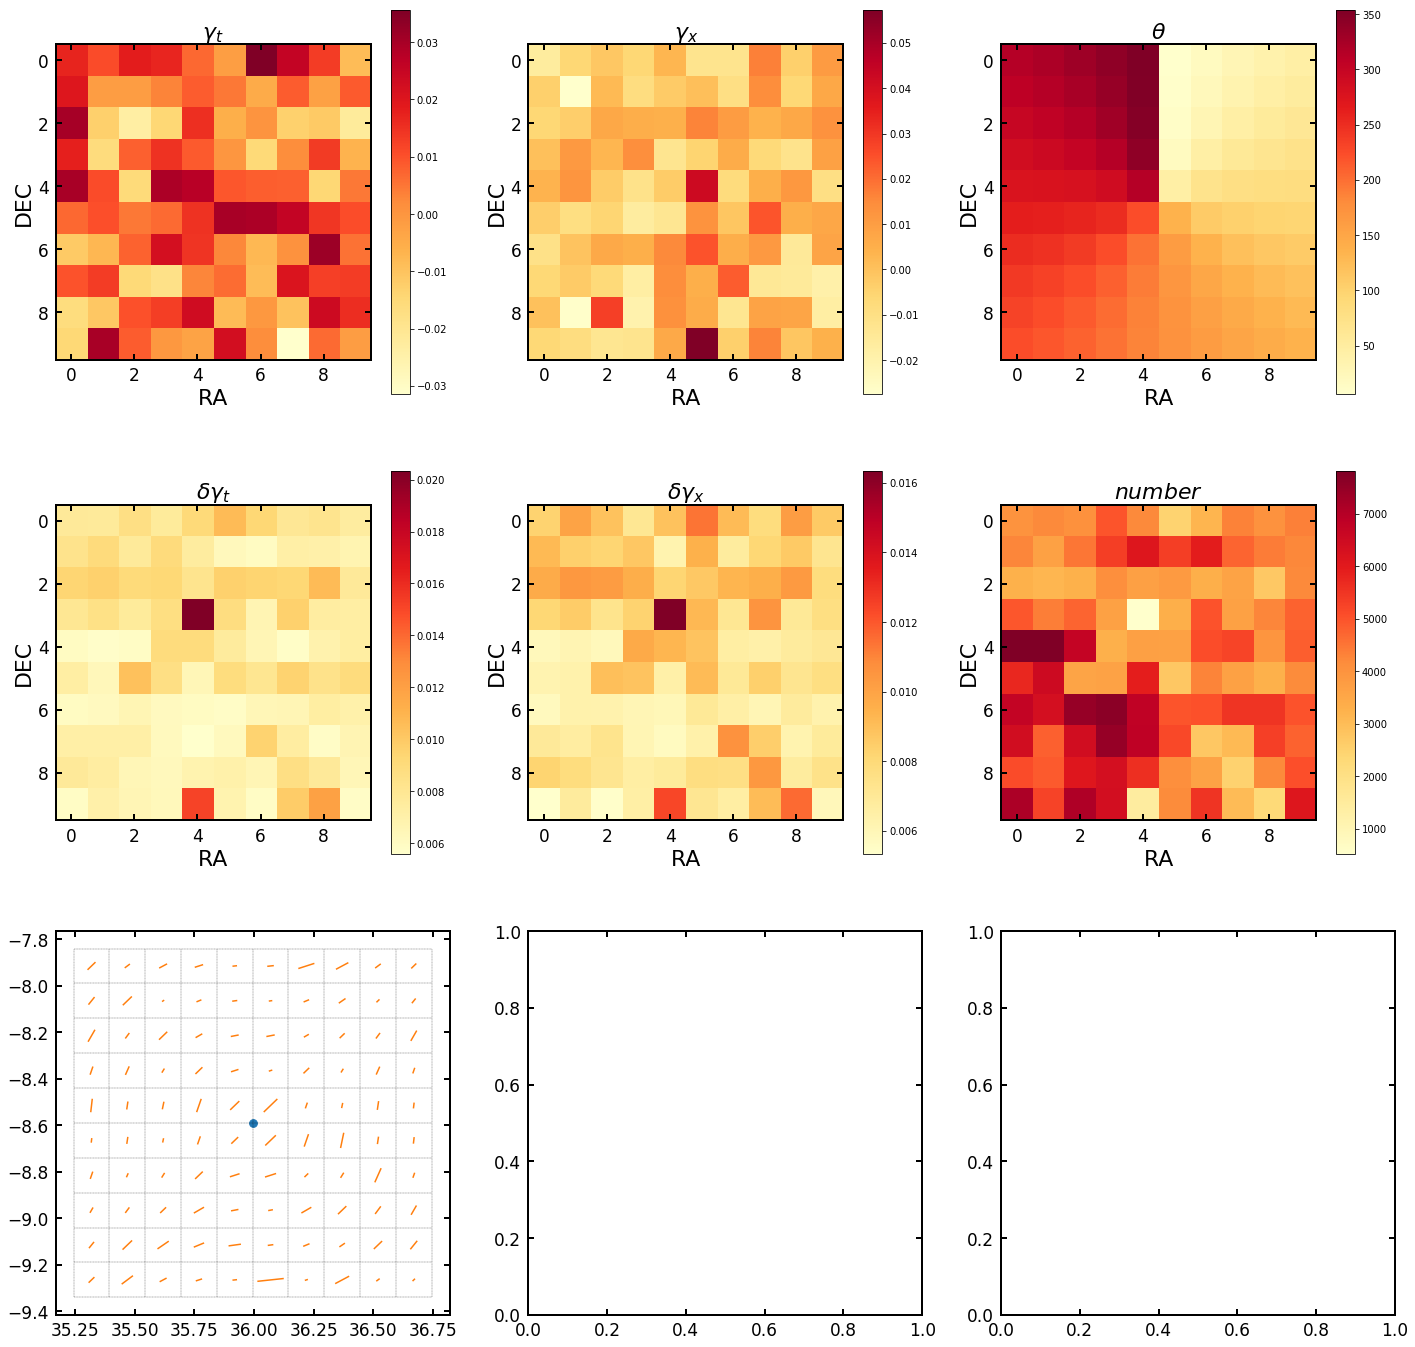

In [41]:
np_data = numpy.load("/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/mass_map/result.npz")

result = np_data["arr_0"]
ra_bin = np_data["arr_1"]
dec_bin = np_data["arr_2"]
foregal = np_data["arr_3"]

inverse = range(ny-1,-1,-1)

gamma_t = result[:ny]
gamma_t_sig = result[ny:2*ny]
gamma_x = result[2*ny:3*ny]
gamma_x_sig = result[3*ny:4*ny]

gamma = numpy.sqrt(gamma_t**2 + gamma_x**2)

num = result[4*ny:5*ny]
angle = result[5*ny:6*ny]

ra_min, ra_max = ra_bin.min(), ra_bin.max()
dec_min, dec_max = dec_bin.min(), dec_bin.max()

datas = [[gamma_t, gamma_x, angle/numpy.pi*180], [gamma_t_sig,gamma_x_sig,num ]]
titles = [["$\gamma_t$", "$\gamma_x$", "$\\theta$"],
         ["$\delta \gamma_t$","$\delta \gamma_x$","$number$"]]
img = plot_tool.Image_Plot(fig_x=8, fig_y=8)
img.create_subfig(3,3)
cmap = plt.get_cmap('YlOrRd')
sm = plt.cm.ScalarMappable(cmap=cmap)

for i in range(2):
    for j in range(3):
        ax = img.axs[i][j].imshow(datas[i][j][inverse],cmap=cmap)
        img.tick_label(i,j, 1, "RA")
        img.tick_label(i,j, 0, "DEC")
        img.axs[i][j].set_title(titles[i][j],fontsize=img.xy_lb_size)
        img.figure.colorbar(ax, ax=img.axs[i][j])

img.axs[2][0].scatter(foregal[0], foregal[1],s=60,marker="o")
for i in range(ny + 1):
    img.axs[2][0].plot([ra_min, ra_max], [dec_bin[i], dec_bin[i]], c="black", linestyle="--" ,linewidth=0.3)
for j in range(nx + 1):
    img.axs[2][0].plot([ra_bin[j], ra_bin[j]], [dec_min, dec_max], c="black",linestyle="--" , linewidth=0.3)

max_g = gamma.max()
max_len = (ra_bin[2] - ra_bin[1])*0.7

dg_scale = gamma/max_g*max_len/2

for i in range(ny):
    for j in range(nx):
        dx = numpy.abs(dg_scale[i,j]*numpy.cos(angle[i,j]))
        dy = numpy.abs(dg_scale[i,j]*numpy.sin(angle[i,j]))
        x = (ra_bin[j] + ra_bin[j+1])/2
        y = (dec_bin[i] + dec_bin[i+1])/2
        img.axs[2][0].plot([x-dx, x+dx], [y-dy, y+dy],c="C1")
        img.tick_label(i,j, 1, "RA")
        img.tick_label(i,j, 0, "DEC")
img.save_img(data_path + "result.png")

[[ 3209.  3265.  3305. ...,  3290.  3301.  3286.]
 [ 3222.  3351.  3387. ...,  3315.  3297.  3270.]
 [ 3295.  3373.  3422. ...,  3289.  3324.  3310.]
 ..., 
 [ 2724.  2714.  2719. ...,  2626.  2623.  2594.]
 [ 2742.  2738.  2757. ...,  2679.  2667.  2623.]
 [ 2780.  2782.  2773. ...,  2688.  2671.  2682.]]
[[ 3127.  3252.  3270. ...,  3234.  3248.  3274.]
 [ 3233.  3301.  3324. ...,  3262.  3270.  3316.]
 [ 3288.  3327.  3363. ...,  3278.  3277.  3306.]
 ..., 
 [ 2716.  2734.  2702. ...,  2632.  2607.  2632.]
 [ 2762.  2777.  2741. ...,  2648.  2651.  2652.]
 [ 2799.  2811.  2752. ...,  2690.  2665.  2692.]]
0
0
0
0
0
0
0
0
0


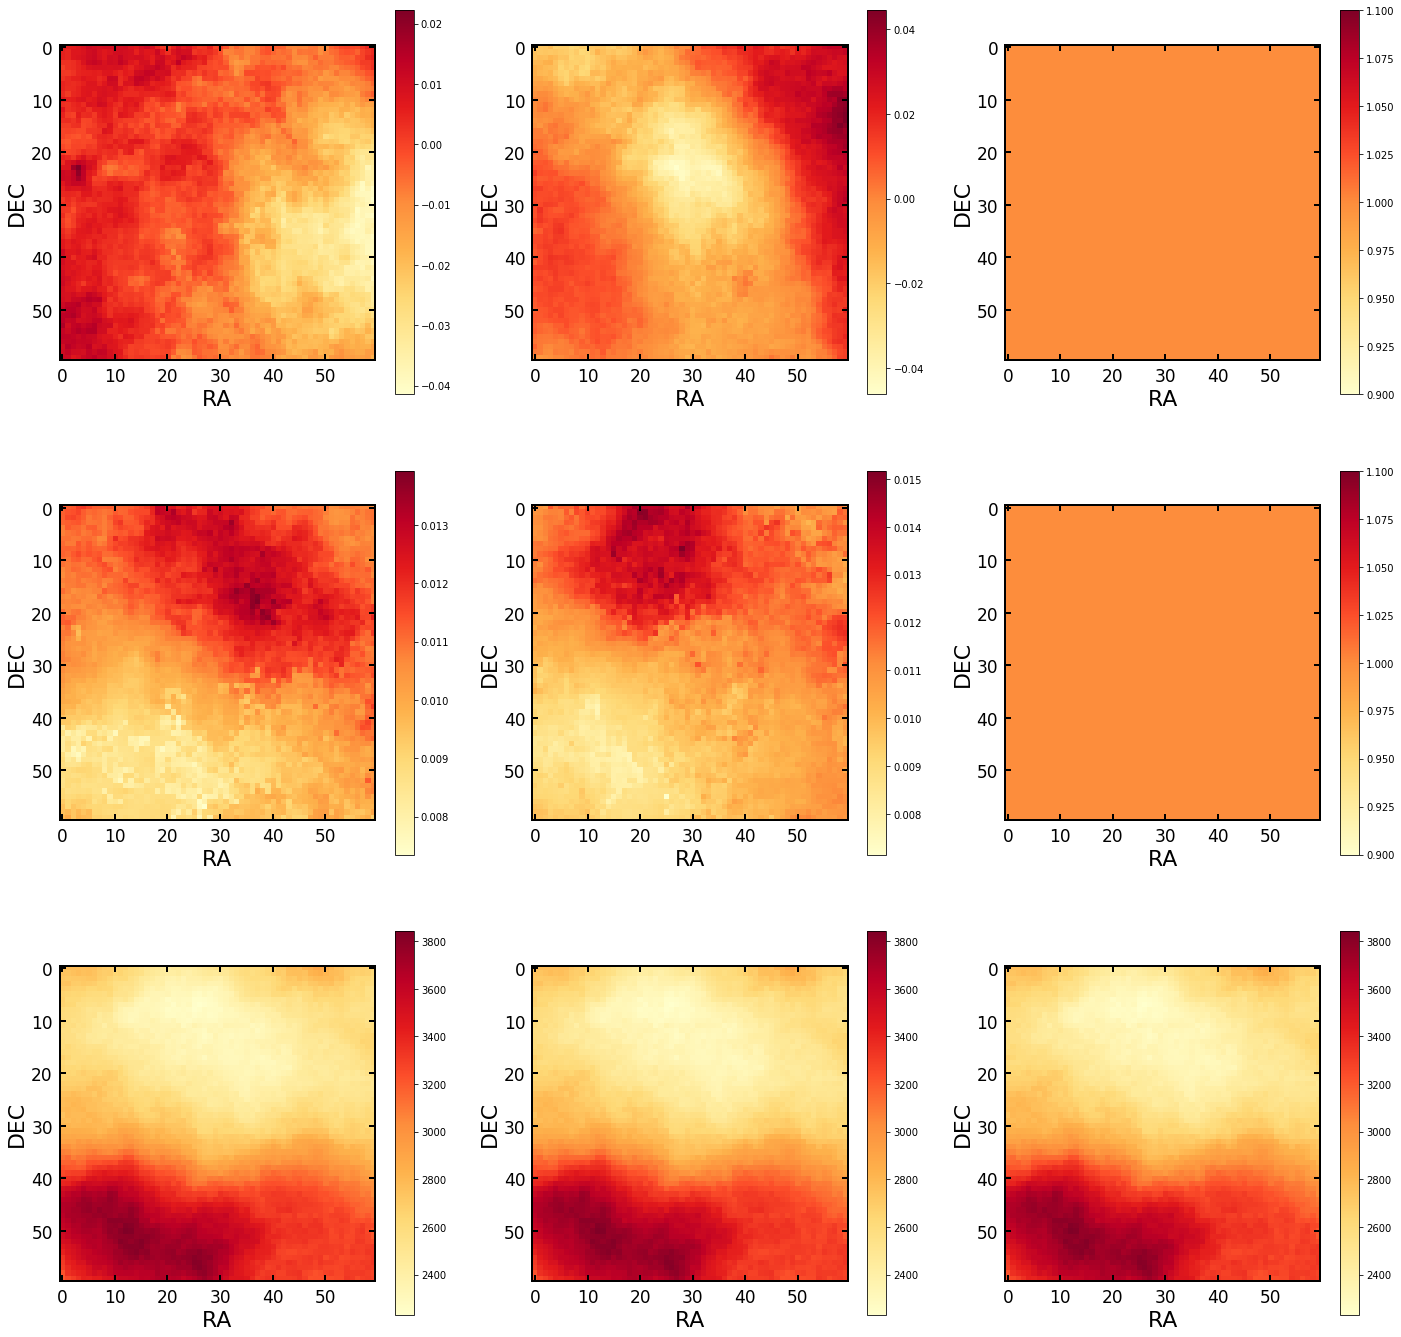

In [21]:
data_path = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/mass_map/CFHT_cluster/w_1/source_0/"

gets_item = [["para", "nx", "0"], ["para", "ny", "0"]]
para_items = tool_box.config(data_path+"result.dat", ["get", "get"], gets_item)

nx, ny = int(para_items[0]), int(para_items[1])

inverse = range(ny-1,-1,-1)

result_astro = numpy.load(data_path + "result.astropy.npz")["arr_0"]
result = numpy.load(data_path + "result.npz")["arr_0"]
print(result[4*ny:5*ny])
print(result_astro[4*ny:5*ny])
g1 = result[:ny]
g1_sig = result[ny:2*ny]
g2 = result[2*ny:3*ny]
g2_sig = result[3*ny:4*ny]
num = result[4*ny:5*ny]
fit_1 = result[5*ny:6*ny]
fit_2 = result[6*ny:7*ny]

datas = [[g1,g2, fit_1],[g1_sig, g2_sig, fit_2 ],[num,num,num]]

img = plot_tool.Image_Plot(fig_x=8, fig_y=8)
img.create_subfig(3,3)
cmap = plt.get_cmap('YlOrRd')
sm = plt.cm.ScalarMappable(cmap=cmap)

for i in range(3):
    for j in range(3):
        idx = datas[i][j] < -1
        print(idx.sum())

        ax = img.axs[i][j].imshow(datas[i][j][inverse],cmap=cmap)
        img.tick_label(i,j, 1, "RA")
        img.tick_label(i,j, 0, "DEC")
#         img.axs[i][j].set_title(titles[i][j],fontsize=img.xy_lb_size)
        img.figure.colorbar(ax, ax=img.axs[i][j])

In [7]:
for i in range(16):
    j = numpy.pi/8*i
    t = numpy.cos(j)
    print(numpy.arccos(t),j)

0.0 0.0
0.392699081699 0.39269908169872414
0.785398163397 0.7853981633974483
1.1780972451 1.1780972450961724
1.57079632679 1.5707963267948966
1.96349540849 1.9634954084936207
2.35619449019 2.356194490192345
2.74889357189 2.748893571891069
3.14159265359 3.141592653589793
2.74889357189 3.5342917352885173
2.35619449019 3.9269908169872414
1.96349540849 4.319689898685965
1.57079632679 4.71238898038469
1.1780972451 5.105088062083414
0.785398163397 5.497787143782138
0.392699081699 5.890486225480862


In [ ]:
y,x = numpy.mgrid[0:]
df_dx = 2*x
df_dy = 2*y
